In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
pizza = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Datasets\pizza.csv")

In [3]:
pizza

,Promote,Sales
0,23,554
1,56,1339
2,34,815
3,25,609
4,67,1600
5,82,2000
6,46,1000
7,14,300
8,6,150
9,47,1150


In [4]:
X = pizza[['Promote']]
y = pizza['Sales']

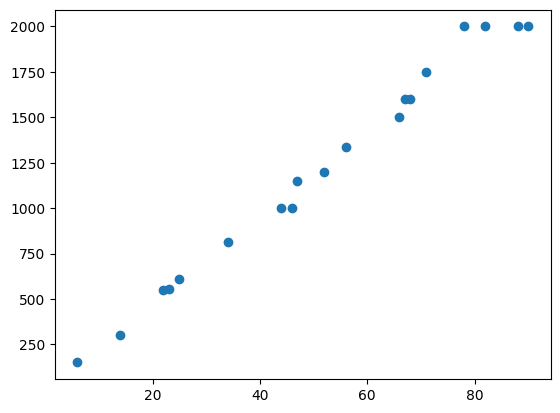

In [5]:
### to apply polinomial features on this dataset we need to under the relationship between these two variables 
plt.scatter(pizza['Promote'],pizza['Sales'])
plt.show()

### here we can see the linear relationship between these two variables 


In [6]:
### no need of polynomial features but if still you want to apply 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size=0.3)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [7]:
### linear Regression 
lr = LinearRegression()
lr.fit(X_train_poly,y_train)

y_pred = lr.predict(X_test_poly)
print("b0 = ",lr.intercept_)
print("b1 = ",lr.coef_)
# calculate mse 
print("mean squared error ",mean_squared_error(y_test,y_pred))

b0 =  -24.376994343144816
b1 =  [ 0.00000000e+00  2.52775750e+01 -2.02908418e-02]
mean squared error  1612.0308033062267


In [8]:
######################### Boston dataset 
boston = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Datasets\Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
X = boston[['dis','lstat']]
y = boston['medv']

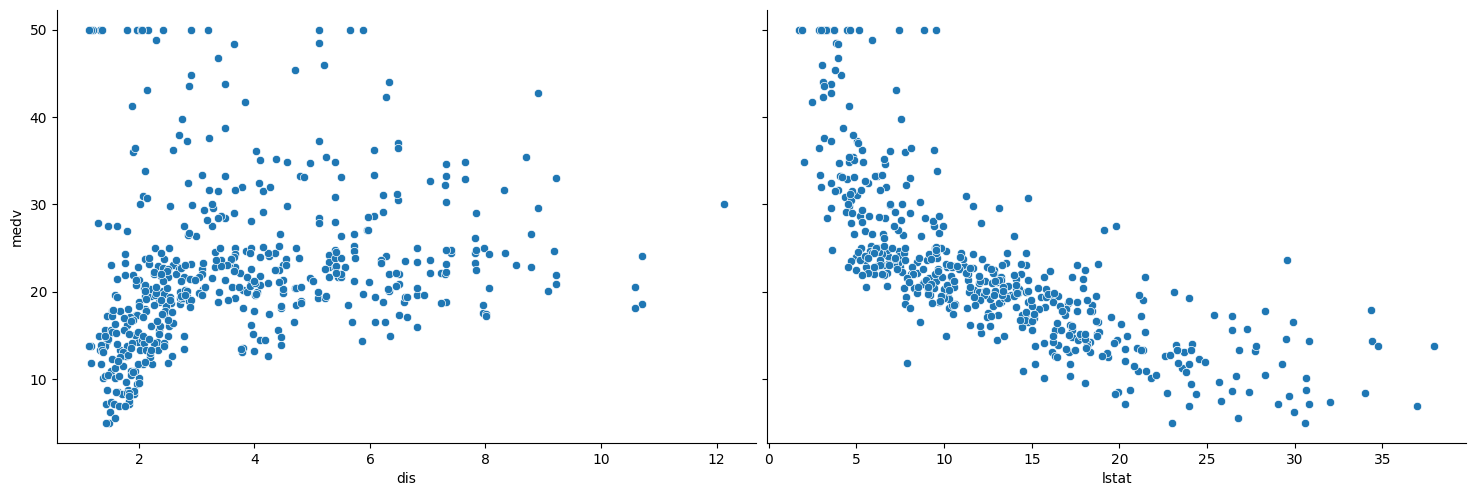

In [10]:
sns.pairplot(boston, x_vars=['dis', 'lstat'], y_vars='medv', height=5, aspect=1.5, kind='scatter')

In [11]:
### apply polynomial features 
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
print(poly.get_feature_names_out())

['1' 'dis' 'lstat' 'dis^2' 'dis lstat' 'lstat^2' 'dis^3' 'dis^2 lstat'
 'dis lstat^2' 'lstat^3' 'dis^4' 'dis^3 lstat' 'dis^2 lstat^2'
 'dis lstat^3' 'lstat^4' 'dis^5' 'dis^4 lstat' 'dis^3 lstat^2'
 'dis^2 lstat^3' 'dis lstat^4' 'lstat^5']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,
                                                    test_size=0.3,
                                                    random_state=23)
### linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))


Mean Squared Error :  52.79014627140662


In [16]:
### With K-Fold 
kfold = KFold(n_splits=5,shuffle=True,random_state=23)
lr = LinearRegression()
degree = [1,2,3,4,5]
scores = []
for n in degree:
    poly = PolynomialFeatures(degree = n)
    X_poly = poly.fit_transform(X)
    results = cross_val_score(lr,X_poly,y,cv = kfold,scoring = 'neg_mean_squared_error')
    scores.append(results.mean())
    
i_max = np.argmax(scores)
print("Best Degree = ",degree[i_max])
print("Best Score = ",scores[i_max])

Best Degree =  4
Best Score =  -23.55190425483885


In [28]:
################ taking all variables
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
X = boston.drop('medv', axis=1)
y = boston['medv']
lr = LinearRegression()
degrees = [1,2,3,4,5]
scores = []
for n in degrees:
    poly = PolynomialFeatures(degree=n)
    X_poly = poly.fit_transform(X)
    results = cross_val_score(lr,X_poly,y, cv=kfold,
                              scoring='neg_mean_squared_error')
    scores.append(results.mean())
i_max = np.argmax(scores)
print("Best degree =", degrees[i_max])
print("Best Score =", scores[i_max])
### Pipeline 
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
lr = LinearRegression()
pipe = Pipeline([('POLY',poly),('LR',lr)])
results = cross_val_score(pipe,X,y,cv = kfold,scoring = 'neg_mean_squared_error')
print(results)
print(results.mean())

Best degree = 2
Best Score = -17.0106923147326
[-23.91057468 -11.30814325 -23.89358724 -12.56706896 -13.37408744]
-17.0106923147326


In [29]:
## Grid Seach CV
from sklearn.model_selection import GridSearchCV
degrees = [1,2,3,4,5]
print(pipe.get_params)
params = {'POLY__degree':degrees}
gcv = GridSearchCV(pipe,param_grid=params,cv = kfold,scoring = 'neg_mean_squared_error')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

<bound method Pipeline.get_params of Pipeline(steps=[('POLY', PolynomialFeatures()), ('LR', LinearRegression())])>
{'POLY__degree': 2}
-17.0106923147326


In scikit-learn, the scoring parameter in cross_val_score() allows you to specify the evaluation metric to be used during cross-validation. When you set scoring='neg_mean_squared_error', it means that the model will be evaluated based on the negative mean squared error (MSE) during each fold of the cross-validation process.
-The reason for taking the negative of the MSE is to maintain consistency with the convention of maximizing scoring metrics.
